In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
y = data.target

In [6]:
print(type(data))
print(data.data)
print(type(data.data))
print(data.data.shape)

<class 'sklearn.utils.Bunch'>
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
<class 'numpy.ndarray'>
(569, 30)


In [7]:
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(569,)


In [10]:
scaler = StandardScaler()
X = scaler.fit_transform(data.data)

In [11]:
alpha=np.logspace(-2,2,5)
print(alpha)

[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


In [12]:
def splt(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random.choice(range(1000)))
    return X_train, X_test, y_train, y_test

In [13]:
def clfn(a, X, y):
    y[y==0] = -1
    sigma = y #sigma = [-1, 1]
    clf = LogisticRegression(C=a, penalty='l2').fit(X, sigma)
    # margin = sigma * h(x)
    margin = sigma * clf.decision_function(X)
    marg_av = np.average(margin) 
    return marg_av

In [15]:
import random
mean = []
std = []

for a in alpha:
    rademacher = []
    for i in range(100):
        X_train, X_test, y_train, y_test = splt(X, y)
        av_marg = clfn(a, X_train, y_train)
        rademacher.append(av_marg)
    mean.append(np.mean(rademacher))
    std.append(np.std(rademacher))

In [16]:
mean[:5]

[2.245934980511007,
 4.522436718761547,
 7.836810952229463,
 12.67241727448768,
 24.678989608211868]

In [17]:
std[:5]

[0.04873326839767586,
 0.12819394656979985,
 0.39931817532861635,
 1.3299060814288863,
 3.658190180451133]

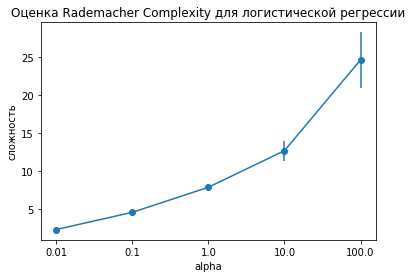

In [23]:
plt.errorbar(np.arange(len(alpha)), mean, std, fmt='-o')
plt.xticks(np.arange(len(alpha)), alpha)
plt.title('Оценка Rademacher Complexity для логистической регрессии')
plt.xlabel('alpha')
plt.ylabel('сложность')
plt.show()

Можно увидеть на графике линейную зависимость: чем больше С=a, тем выше сложность